In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
data = keras.datasets.imdb

<module 'keras.api._v2.keras.datasets.imdb' from 'C:\\Users\\Snehd\\anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\imdb\\__init__.py'>

In [3]:
(x_train, y_train), (x_test, y_test) = data.load_data(num_words=10000)

In [4]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=256, padding="post", value=0)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=256, padding="post", value=0)

In [5]:
model = keras.Sequential([
    keras.layers.Embedding(10000, 16),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

In [6]:
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])

In [8]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 2s 2ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 1.8254 - val_accuracy: 0.8286
Epoch 2/10
782/782 [==============================] - 2s 2ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.8842 - val_accuracy: 0.8303
Epoch 3/10
782/782 [==============================] - 2s 2ms/step - loss: 6.5868e-04 - accuracy: 1.0000 - val_loss: 1.9396 - val_accuracy: 0.8300
Epoch 4/10
782/782 [==============================] - 2s 2ms/step - loss: 4.2234e-04 - accuracy: 1.0000 - val_loss: 1.9904 - val_accuracy: 0.8296
Epoch 5/10
782/782 [==============================] - 2s 2ms/step - loss: 0.0028 - accuracy: 0.9990 - val_loss: 2.2149 - val_accuracy: 0.8272
Epoch 6/10
782/782 [==============================] - 2s 2ms/step - loss: 0.0055 - accuracy: 0.9984 - val_loss: 2.0988 - val_accuracy: 0.8291
Epoch 7/10
782/782 [==============================] - 2s 2ms/step - loss: 0.0037 - accuracy: 0.9987 - val_loss: 2.0982 - val_accuracy: 0.828

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
test_loss, test_acc

782/782 [==============================] - 1s 666us/step - loss: 2.1312 - accuracy: 0.8284


(2.1311914920806885, 0.8284000158309937)

In [16]:
y_pred = np.round(model.predict(x_test)).flatten()

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_pred, y_test)
cr = classification_report(y_pred, y_test)

cm

array([[10470,  2260],
       [ 2030, 10240]], dtype=int64)

In [20]:
print(cr)

              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83     12730
         1.0       0.82      0.83      0.83     12270

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



<AxesSubplot:>

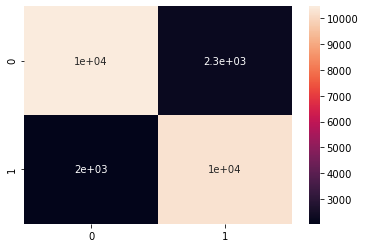

In [22]:
import seaborn as sns
sns.heatmap(cm, annot=True)